# __Ecommerce Customer Churn Analysis and Prediction__

| Column                       | Descriptions                                                    |
| --------------------------- | ---------------------------------------------------------- |
| CustomerID                  | Unique customer ID                                            |
| Churn                       | Churn Flag                                                    |
| Tenure                      | Tenure of customer in organization (Durasi Berlangganan)                            |
| PreferredLoginDevice        | Preferred login device of customer                            |
| CityTier                    | City tier                                                     |
| WarehouseToHome             | Distance in between warehouse to home of customer             |
| PreferredPaymentMode        | Preferred payment method of customer                          |
| Gender                      | Gender of customer                                            |
| HourSpendOnApp              | Number of hours spend on mobile application or website        |
| NumberOfDeviceRegistered    | Total number of deceives is registered on particular customer |
| PreferedOrderCat            | Preferred order category of customer in last month            |
| SatisfactionScore           | Satisfactory score of customer on service                     |
| MaritalStatus               | Marital status of customer                                    |
| NumberOfAddress             | Total number of added added on particular customer            |
| Complain                    | Any complaint has been raised in last month                   |
| OrderAmountHikeFromlastYear | Percentage increases in order from last year                  |
| CouponUsed                  | Total number of coupon has been used in last month            |
| OrderCount                  | Total number of orders has been places in last month          |
| DaySinceLastOrder           | Day Since last order by customer                              |
| CashbackAmount              | Average cashback in last month                                |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

sns.set_theme(style='darkgrid')
sns.set(font_scale=1.2, palette='Set1')

In [2]:
df = pd.read_excel('E Commerce Dataset.xlsx')

In [3]:
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3259,53260,0,10.0,Computer,3,15.0,Debit Card,Male,4.0,5,Fashion,5,Single,3,0,16.0,1.0,2.0,10.0,200.87
3363,53364,0,7.0,Mobile Phone,1,7.0,UPI,Male,4.0,5,Mobile Phone,5,Single,5,1,12.0,1.0,2.0,3.0,152.99
835,50836,0,14.0,Computer,3,6.0,E wallet,Female,3.0,3,Laptop & Accessory,5,Married,1,0,17.0,0.0,1.0,7.0,141.03
358,50359,0,8.0,Phone,1,31.0,UPI,Male,2.0,4,Laptop & Accessory,2,Single,5,0,14.0,0.0,1.0,2.0,136.81
4505,54506,0,1.0,Mobile Phone,1,33.0,Debit Card,Male,3.0,4,Mobile Phone,1,Married,3,0,13.0,1.0,2.0,3.0,154.04


## __EXPLORATORY DATA ANALYSIS__

### __DESCRIPTIVE ANALYSIS__

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Tipe data pada kolom Churn, CityTier, Complain seharusnya string

In [5]:
#drop kolom CustomerID karena unik di masing2 row, jadi tidak berguna untuk model
df.drop(columns='CustomerID', inplace=True)

#Convert kolom yang seharusnya kategorikal
for i in ['Churn','CityTier','Complain']:
        df[i] = df[i].astype(str)

In [6]:
#Split data numerik dan kategorik
num = df.select_dtypes('number').columns
kat = df.select_dtypes('object').columns

In [7]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.00,3.00,7.0000,46.00


In [8]:
df[kat].describe().T

,count,unique,top,freq
Churn,5630,2,0,4682
PreferredLoginDevice,5630,3,Mobile Phone,2765
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986
Complain,5630,2,0,4026


In [9]:
for i in kat:
        print(df[i].value_counts(normalize=True).multiply(100))
        print('')

0    83.161634
1    16.838366
Name: Churn, dtype: float64

Mobile Phone    49.111901
Computer        29.023091
Phone           21.865009
Name: PreferredLoginDevice, dtype: float64

1    65.115453
3    30.586146
2     4.298401
Name: CityTier, dtype: float64

Debit Card          41.101243
Credit Card         26.660746
E wallet            10.905861
UPI                  7.353464
COD                  6.483126
CC                   4.849023
Cash on Delivery     2.646536
Name: PreferredPaymentMode, dtype: float64

Male      60.106572
Female    39.893428
Name: Gender, dtype: float64

Laptop & Accessory    36.412078
Mobile Phone          22.575488
Fashion               14.671403
Mobile                14.369449
Grocery                7.282416
Others                 4.689165
Name: PreferedOrderCat, dtype: float64

Married     53.037300
Single      31.900533
Divorced    15.062167
Name: MaritalStatus, dtype: float64

0    71.509769
1    28.490231
Name: Complain, dtype: float64



Ada beberapa value yg ambigu :
- kolom PreferredLoginDevice = Mobile Phone & Phone
- kolom PreferredPaymentMode = Cash on Delivery & COD , Credit Card & CC
- kolom PreferedOrderCat = Mobile Phone & Mobile

Di step preprocessing akan di replace value dg salah satu value

#### Missing Values

In [10]:
print(round(df.isna().sum()/df.shape[0]*100,2))
print("\nTotal : ",round(df.isna().any(axis=1).sum()/df.shape[0]*100,2),'%')

Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

Total :  32.97 %


<AxesSubplot:>

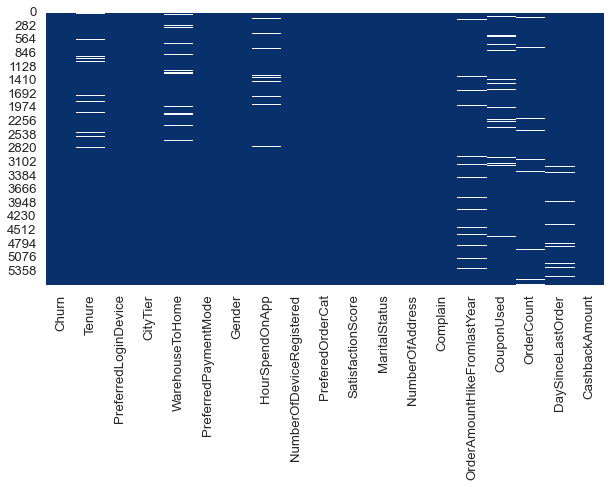

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(~df.isna(), cmap='Blues', cbar=False)

Karena data yg kosong sangat banyak yakni 33% maka nanti akan di impute menggunakan median (numeric) dan most frequent (kategorik)

#### Duplicate Data

In [12]:
df.duplicated().sum()

556

Terdapat sebanyak 556 baris yang duplikat, akan dihapus pada saat preprocessing data

#### Deteksi Outliers

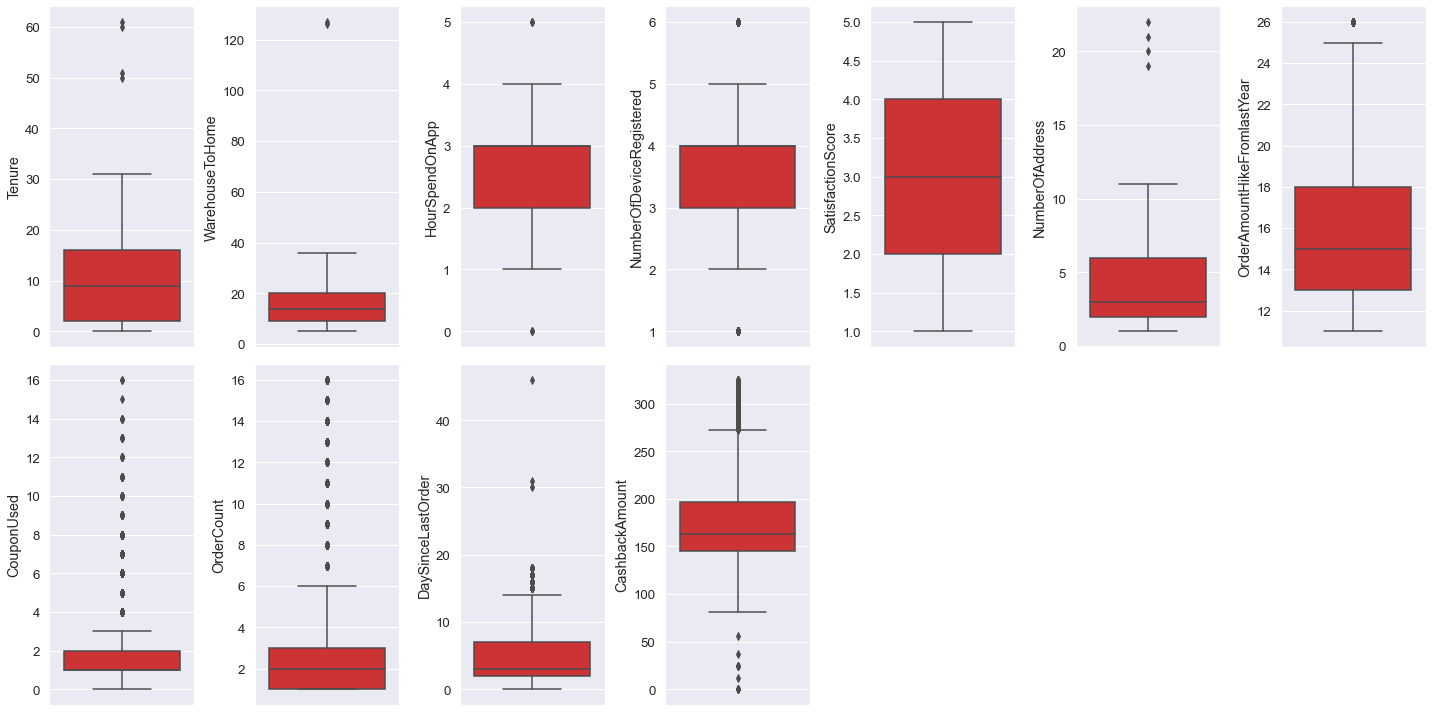

In [13]:
plt.figure(figsize=(20,10))
for i,j in enumerate(num):
        plt.subplot(2,7,i+1)
        sns.boxplot(y=df[j])
        plt.tight_layout()

In [76]:
for j in num:
        q1 = df[j].quantile(0.25)
        q3 = df[j].quantile(0.75)
        iqr = q3-q1
        lowlimit = q1 - (iqr *1.5)
        highlimit = q3 + (iqr*1.5)

        if df[(df[j]<lowlimit) | (df[j]>highlimit)].shape[0]>0:
                print('Outlier dari kolom',"\""+j+"\"",'sebanyak (', df[(df[j]<lowlimit) | (df[j]>highlimit)].shape[0],") \t\t\t\t|Low ="+str(lowlimit)+"|High|")

Outlier dari kolom "Tenure" sebanyak ( 4 ) 				|Low =-19.0|High|
Outlier dari kolom "WarehouseToHome" sebanyak ( 2 ) 				|Low =-7.5|High|
Outlier dari kolom "HourSpendOnApp" sebanyak ( 6 ) 				|Low =0.5|High|
Outlier dari kolom "NumberOfDeviceRegistered" sebanyak ( 397 ) 				|Low =1.5|High|
Outlier dari kolom "NumberOfAddress" sebanyak ( 4 ) 				|Low =-4.0|High|
Outlier dari kolom "OrderAmountHikeFromlastYear" sebanyak ( 33 ) 				|Low =5.5|High|
Outlier dari kolom "CouponUsed" sebanyak ( 629 ) 				|Low =-0.5|High|
Outlier dari kolom "OrderCount" sebanyak ( 703 ) 				|Low =-2.0|High|
Outlier dari kolom "DaySinceLastOrder" sebanyak ( 62 ) 				|Low =-5.5|High|
Outlier dari kolom "CashbackAmount" sebanyak ( 438 ) 				|Low =69.83625|High|


Jumlah outlier pada dataset cukup banyak, nantinya outlier yang < low limit akan di impute dengan low limit, sedangkan nilai yang > high limit akan di impute dengan high limit

### __UNIVARIATE ANALYSIS__

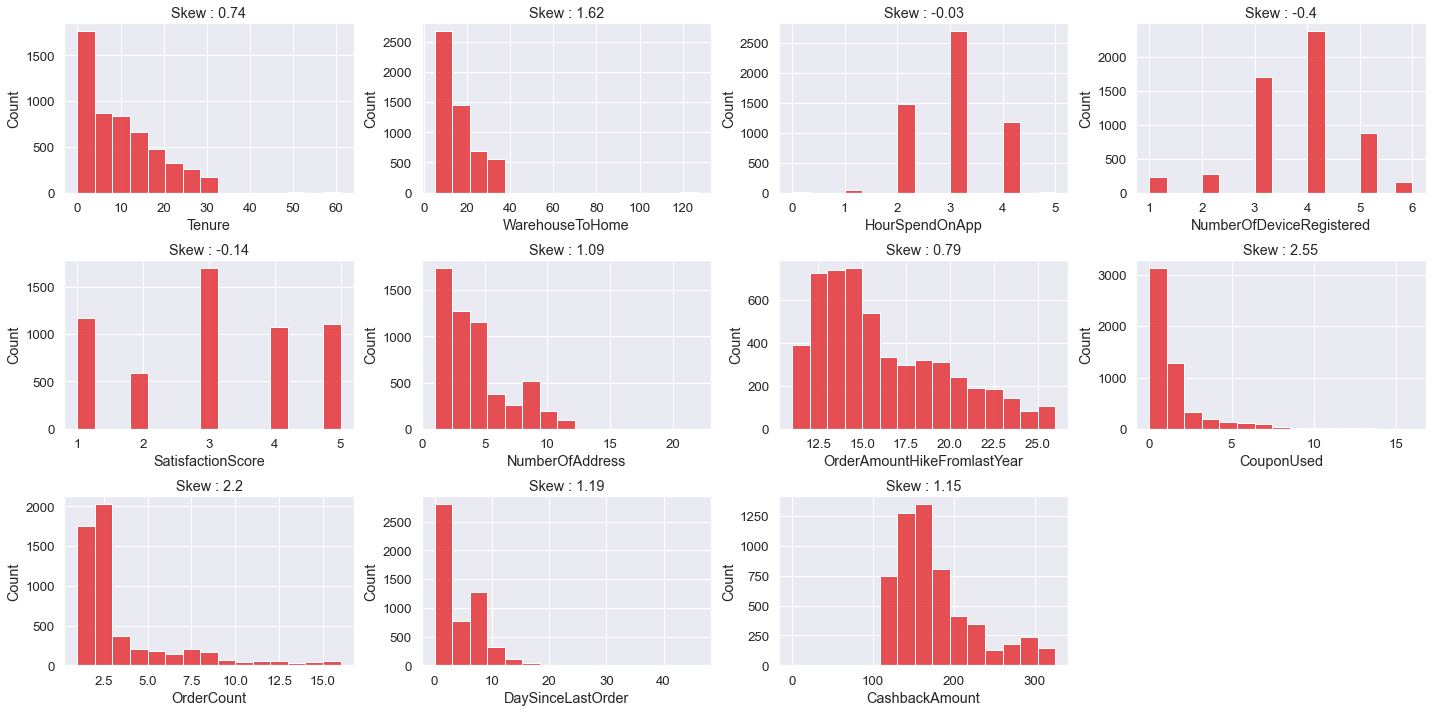

In [15]:
plt.figure(figsize=(20,10))
for i,j in enumerate(num):
        plt.subplot(3,4,i+1)
        sns.histplot(x=df[j], bins=15)
        plt.title("Skew : "+ str(round(df[j].skew(),2)))
        plt.tight_layout()

- Pada kolom `Tenure` terlihat bahwa customer terbanyak adalah pelanggan baru
- Pada kolom `warehouseToHome` lebih banyak customer yang rumahnya dekat dengan warehouse kita
- Kebanyakan Customer registrasi di e Commerce kita dengan `device` lebih dari 1 
- Data `kepuasan pelanggan` paling banyak di `bintang 3`, artinya customer masih belum terlalu puas dengan eCommerce kita, apalagi bintang 1 distribusinya masih cukup tinggi
- Banyak customer yang masih tidak menggunakan `coupon`
- Banyak customer yang hanya `repeat order` sebanyak 2-3 kali
- `Persentase kenaikan order` dari tahun lalu masih cukup banyak yang rendah di angka 12%-15%

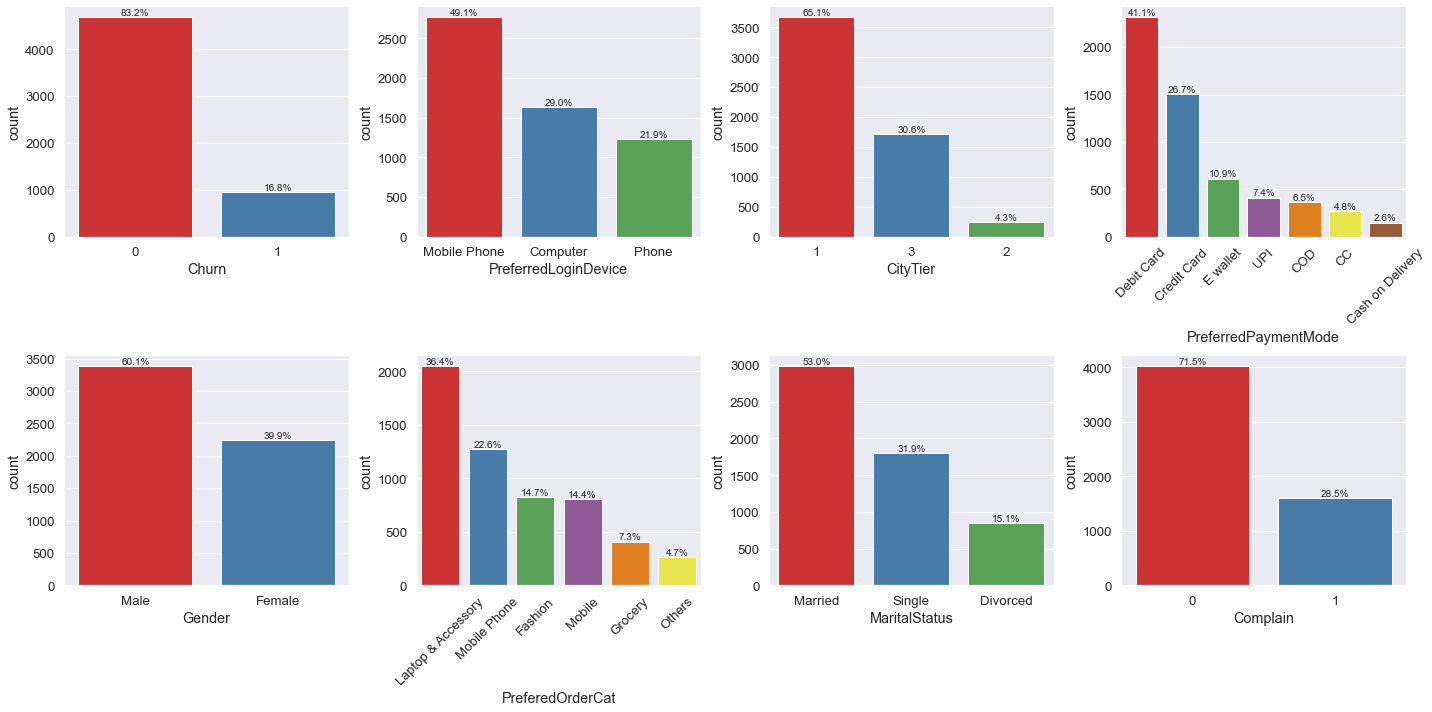

In [16]:
plt.figure(figsize=(20,10))
for i,j in enumerate(kat):
        plt.subplot(2,4,i+1)

        #sort from highest to lowest
        ax = sns.countplot(x=df[j], order=df[j].value_counts(ascending=False).index)
        
        #generate label (%)
        persen = round(df[j].value_counts(normalize=True, ascending=False),3).values*100
        label = [f'{p:.1f}%'  for p in persen]
        ax.bar_label(container=ax.containers[0], labels=label)
        
        # rotate label
        if j in ['PreferredPaymentMode','PreferedOrderCat']:
                plt.xticks(rotation=45)
        
        plt.tight_layout()

- `Churn rate` di ecommerce kita masih bisa diturunkan lagi
- Kebanyakan customer menggunakan `mobile phone` untuk login ke ecommerce kita
- Banyak customer berasar dari `city tier` 1
- Banyak customer lebih suka melakukan pembayaran dengan `debit card`
- Kategori paling banyak dibeli adalah `Laptop & Accessory`
- Setengah populasi customer berstatus `married`

### __BIVARIATE ANALYSIS__

#### Numeric VS Target

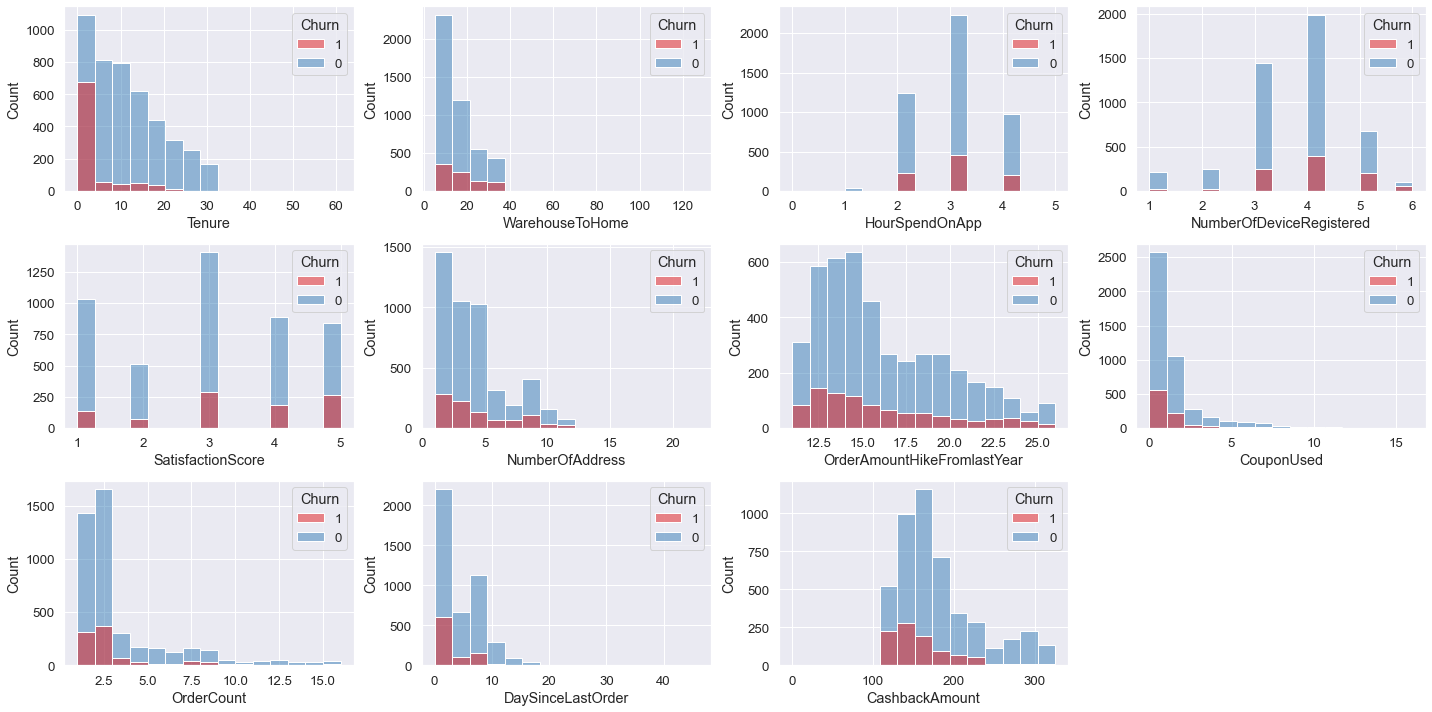

In [17]:
plt.figure(figsize=(20,10))
for i,j in enumerate(num):
        plt.subplot(3,4,i+1)
        sns.histplot(x=j,  hue='Churn', data=df, bins=15)
        plt.tight_layout()

- Kebanyakan customer churn dengan `tenure` 0 (Pelanggan Baru)
- Customer yg churn kebanyak `orderCount` nya 1-3

#### Kategorik VS Target

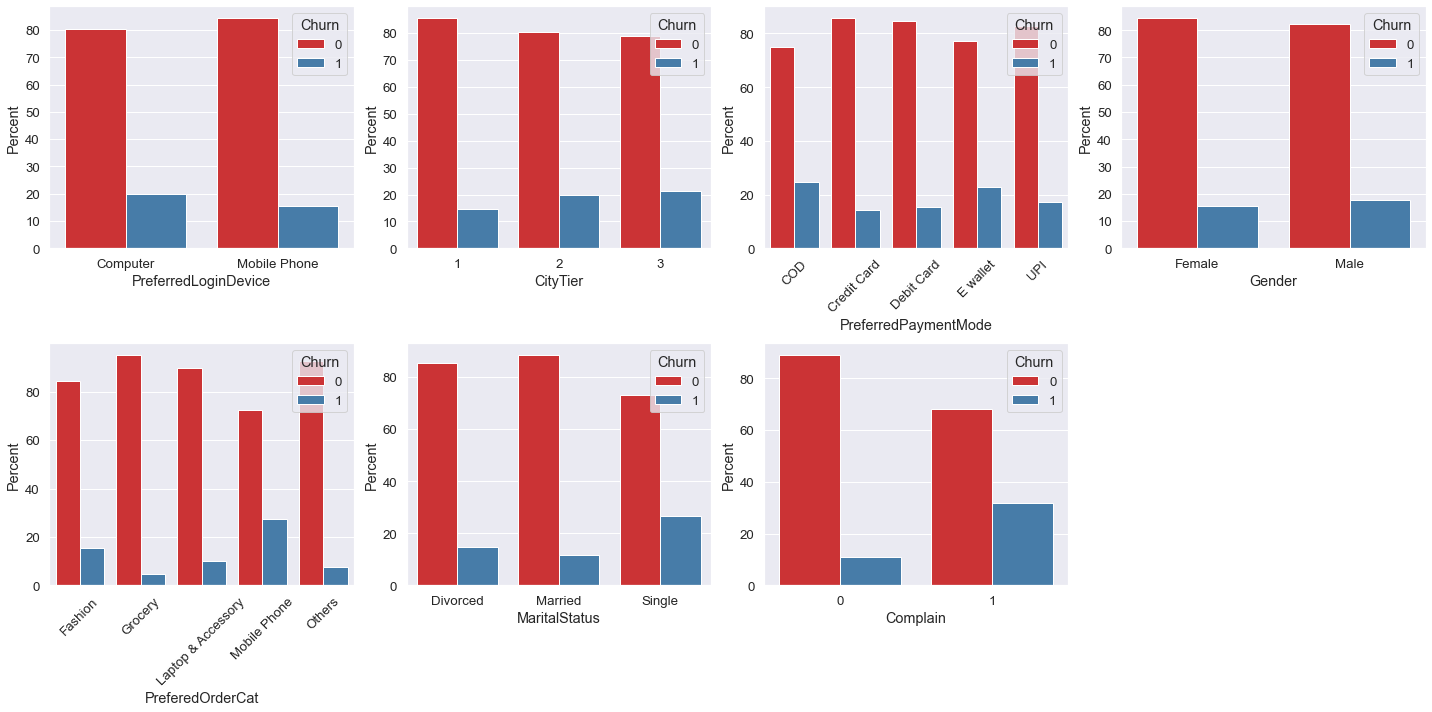

In [18]:
#Handle Duplikasi Value
df['PreferredPaymentMode'].replace('Cash on Delivery','COD', inplace=True)
df['PreferredPaymentMode'].replace('CC','Credit Card', inplace=True)
df['PreferredLoginDevice'].replace('Phone','Mobile Phone', inplace=True)
df['PreferedOrderCat'].replace('Mobile','Mobile Phone', inplace=True)


plt.figure(figsize=(20,10))
kat=kat.drop('Churn', errors='ignore')
for i,j in enumerate(kat):
        plt.subplot(2,4,i+1)

        #sudah di normalize (bentuk persentase)
        normal = df.groupby(j)['Churn'].value_counts(normalize=True).multiply(100).rename('Percent').reset_index()
        sns.barplot(data=normal, x=j, y='Percent', hue='Churn')
        
        # rotate label
        if j in ['PreferredPaymentMode','PreferedOrderCat']:
                plt.xticks(rotation=45)
        
        plt.tight_layout()


- Customer yang membeli produk kategori `Mobile Phone` cenderung lebih banyak churn
- Customer yang berstatus `single` cenderung lebih banyak churn
- Customer yang `complain` cenderung akan churn

### __MULTIVARIATE ANALYSIS__

<AxesSubplot:>

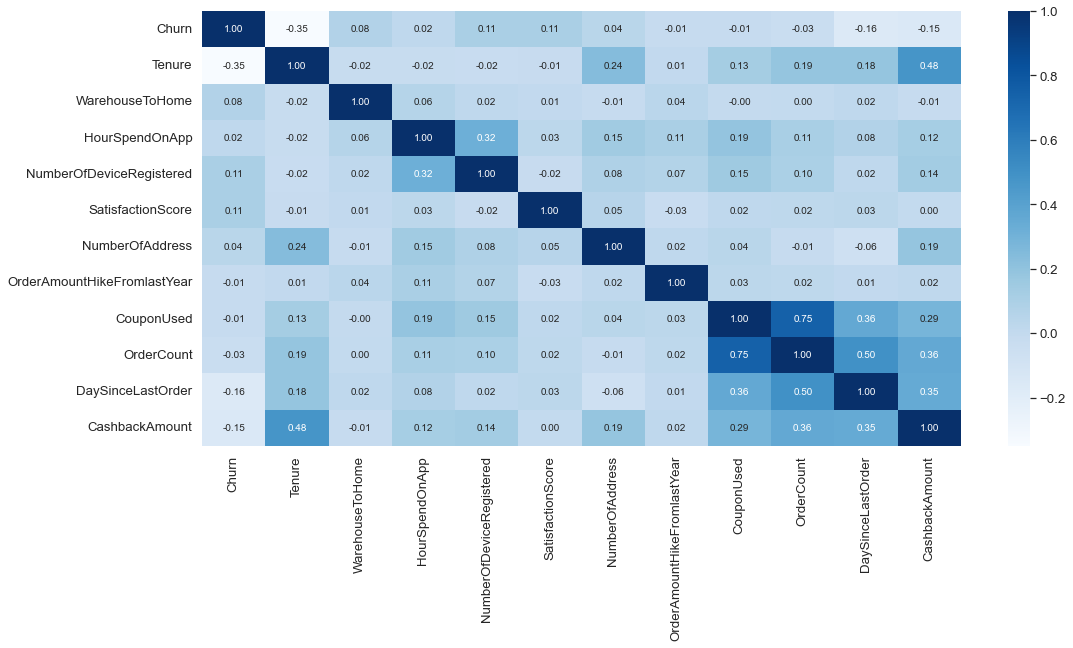

In [19]:
#karena untuk memuncukan ke heatmap harus type data numeric, maka convert churn jadi numeric

df2 = df.copy()
df2['Churn'] = df2['Churn'].astype(int)
plt.figure(figsize=(17,8))                
sns.heatmap(df2.corr(), annot=True, fmt='.2f', cmap='Blues')


5 Fitur dengan korelasi yang lebih tinggi dari fitur lain yaitu : Tenure, NumberOfDeviceRegistered, SatisfactionScore, DaySinceLastOrder dan CashbackAmount

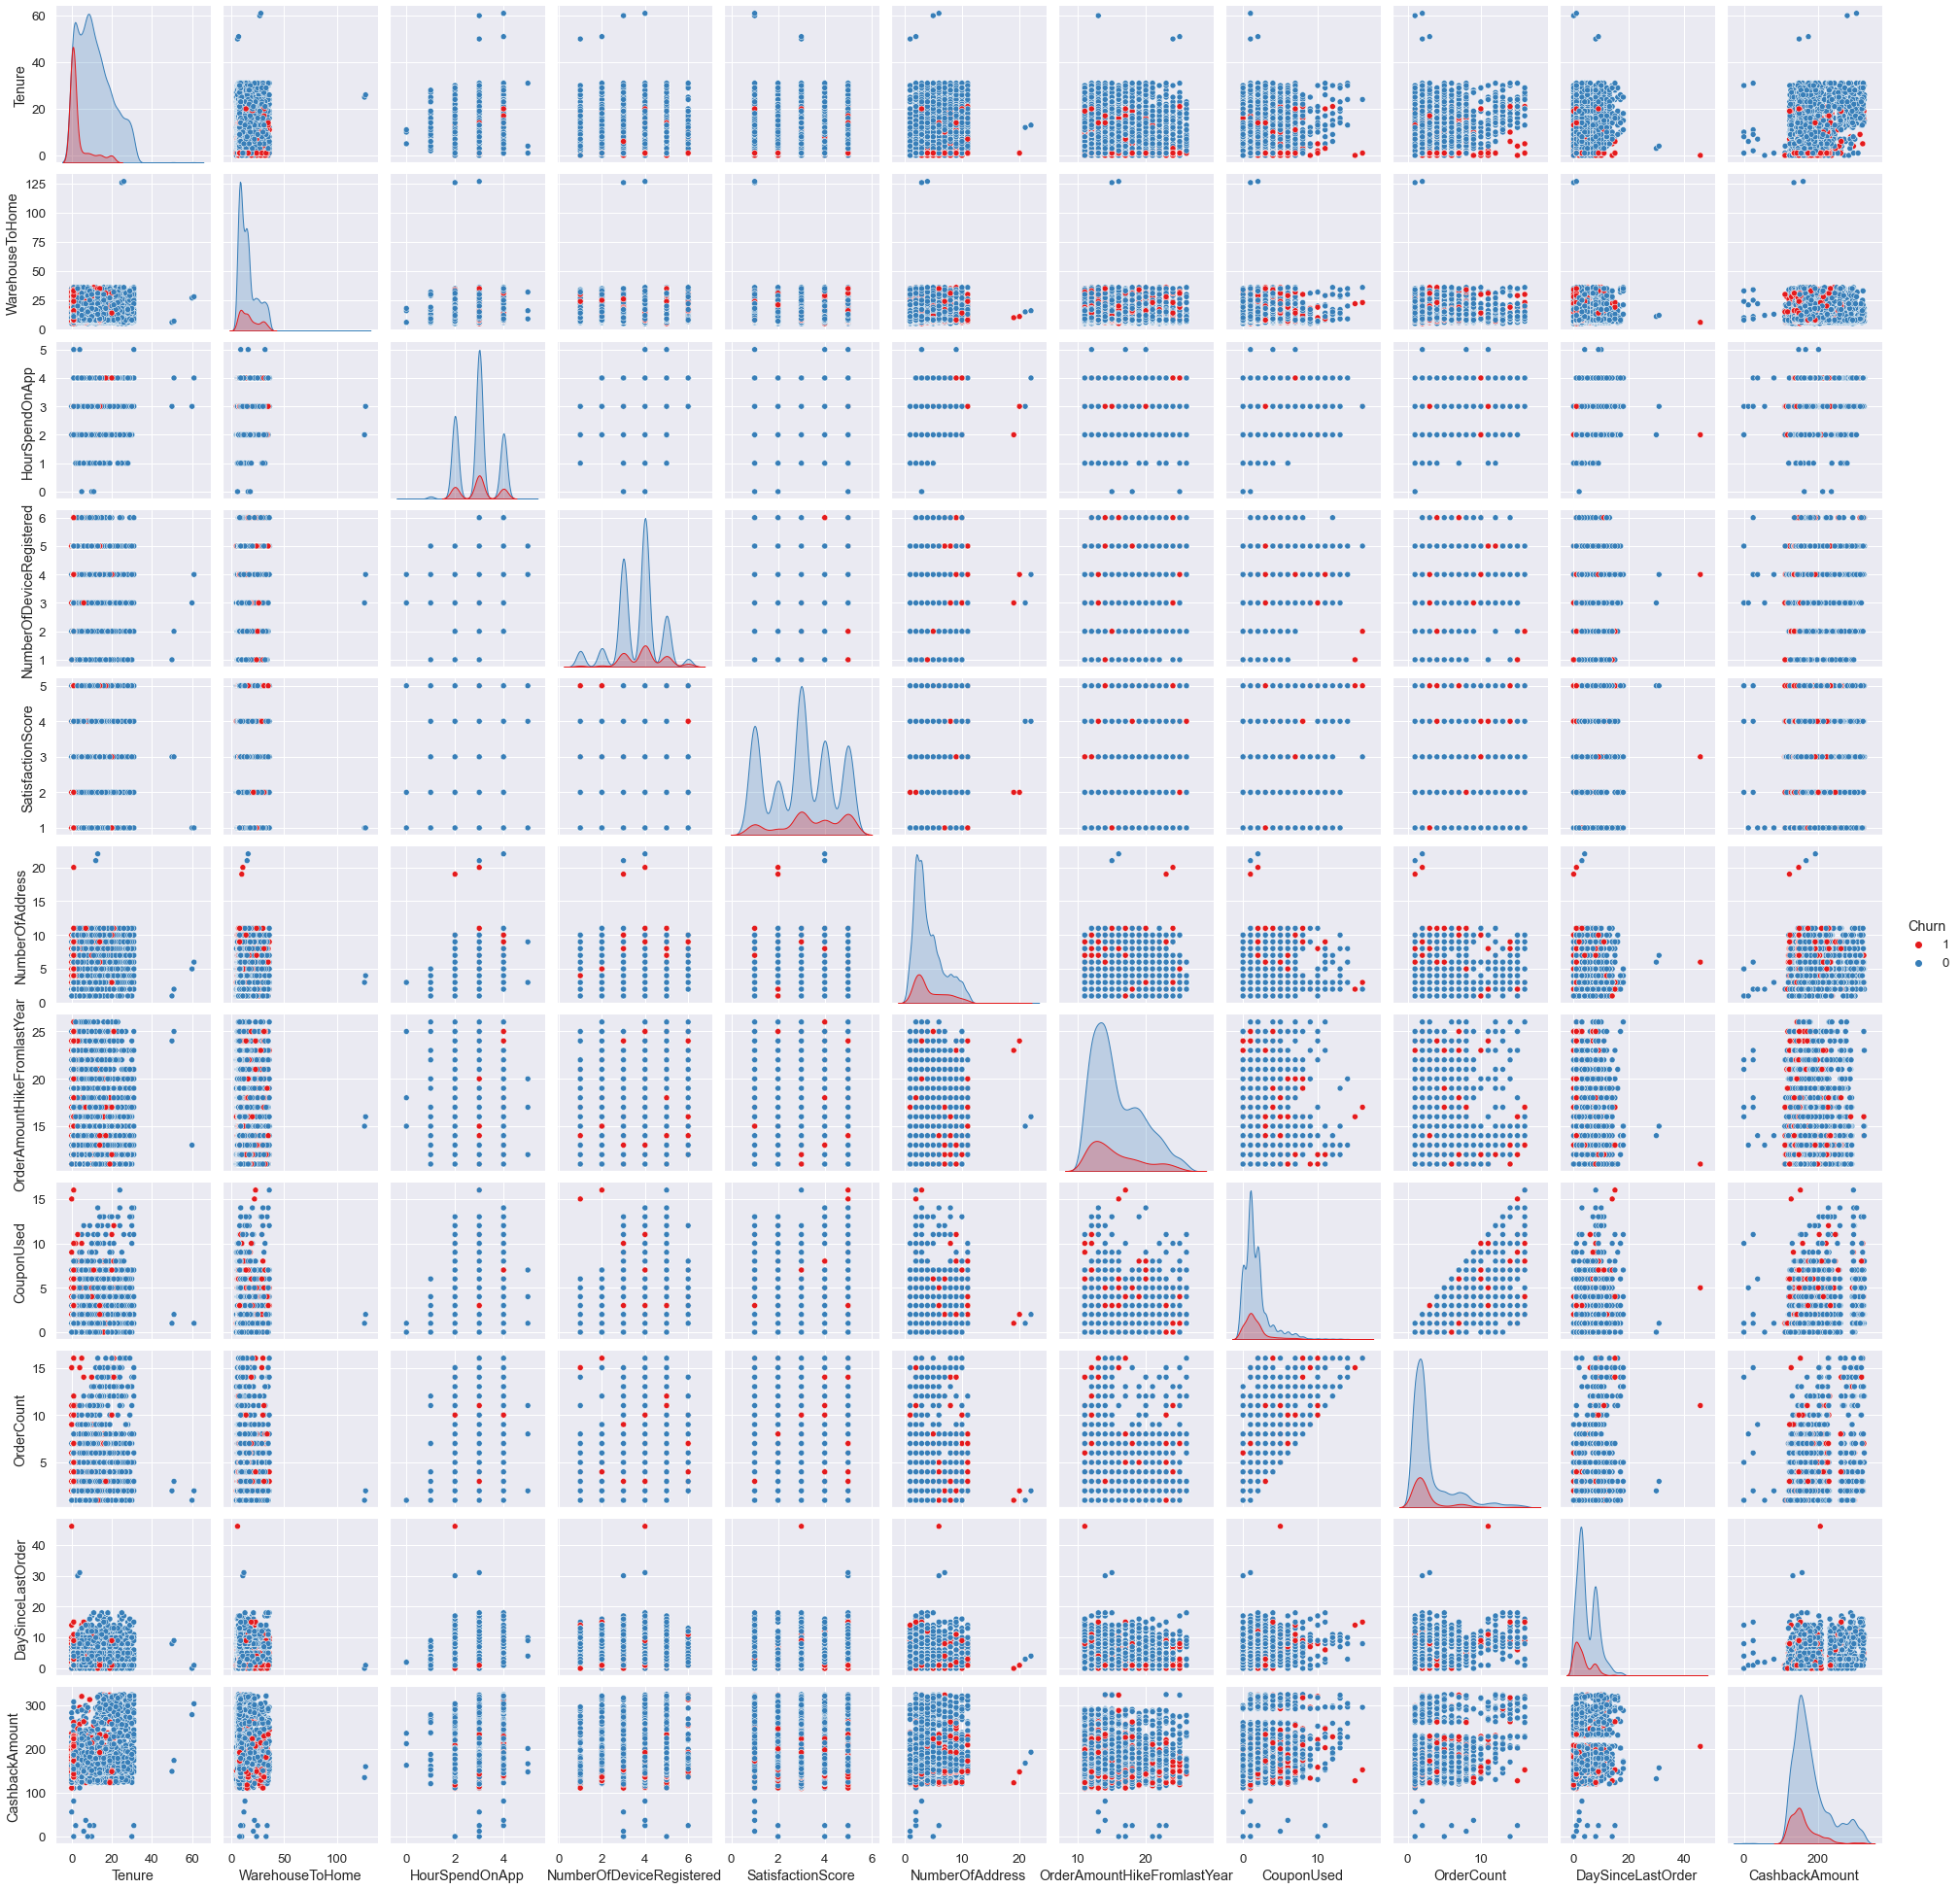

In [20]:
sns.pairplot(df, hue='Churn')

Tidak ada scatter plot yang terlihat memisahkan 2 warna secara jelas

## __DATA PREPROCESSING__

### __SPLITTING DATA__

In [63]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4504, 18), (1126, 18), (4504,), (1126,))

In [64]:
#menggabungkan kolom untuk keperluan preprocessing
train = pd.concat([X_train,pd.DataFrame(y_train)], axis=1)
test = pd.concat([X_test,pd.DataFrame(y_test)], axis=1)

### __HANDLE MISSING VALUE__

Karena in total data yang kosong sebesar 33% maka akan di impute dengan median (numeric) dan most frequent (categorik)

In [65]:
from sklearn.impute import SimpleImputer

for i in train.select_dtypes('number').columns:
        imputer_num = SimpleImputer(strategy='median').fit(train[[i]])
        train[i] = imputer_num.transform(train[[i]])
        test[i] = imputer_num.transform(test[[i]])

for i in train.select_dtypes('object').columns:
        imputer_kat = SimpleImputer(strategy='most_frequent').fit(train[[i]])
        train[i] = imputer_kat.transform(train[[i]])
        test[i] = imputer_kat.transform(test[[i]])

### __HANDLE DUPLICATE DATA__

In [66]:
print("Duplikasi Train :", train.duplicated().sum())
print("Duplikasi Test", test.duplicated().sum())

print("\nBefore :")
print(train.shape, test.shape)

train.drop_duplicates(keep='first', inplace=True)
test.drop_duplicates(keep='first', inplace=True)

print('\nAfter :')
print(train.shape, test.shape)

Duplikasi Train : 370
Duplikasi Test 25

Before :
(4504, 19) (1126, 19)

After :
(4134, 19) (1101, 19)


### __FEATURE EXTRACTION__

[REFERENSI](https://help.shopee.ph/portal/article/81497-How-will-I-know-my-current-Loyalty-Tier-for-the-Shopee-Loyalty-Program%3F)